In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
nba = pd.read_csv("NBADataJan122024.csv")
#get rid of Rk column as it it just an ID number
nba = nba.drop(columns=nba.columns[0])
nba["WinPercentage"]=np.round(nba.WINS/nba.G, 2)
nba.head()

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,TRB,AST,STL,BLK,TOV,PF,PTS,WINS,LOSSES,WinPercentage
0,Memphis Grizzlies,39,240.0,44.9,93.2,0.482,14.0,38.0,0.368,30.9,...,48.5,29.9,9.2,6.4,17.3,21.3,123.0,25,14,0.64
1,Cleveland Cavaliers,37,240.0,45.2,89.6,0.505,16.3,40.4,0.405,28.9,...,43.6,29.4,8.8,4.6,13.0,18.2,122.9,33,4,0.89
2,Denver Nuggets,37,242.7,45.1,90.4,0.499,11.9,31.1,0.382,33.2,...,45.3,31.5,8.8,4.7,14.1,18.1,120.6,22,15,0.59
3,Chicago Bulls,38,240.7,43.4,92.3,0.471,16.4,43.8,0.375,27.0,...,45.3,29.6,7.7,4.7,15.1,18.1,118.2,18,20,0.47
4,Boston Celtics,38,242.0,41.6,90.6,0.460,18.0,49.5,0.364,23.6,...,44.9,25.4,7.6,5.7,12.0,16.1,117.9,27,11,0.71


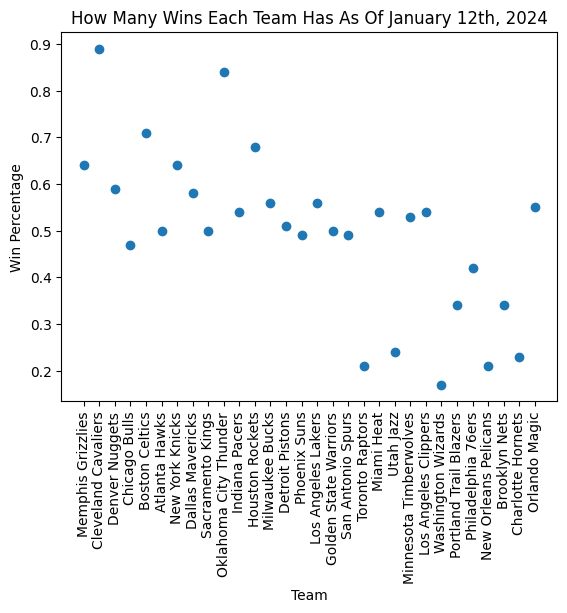

In [154]:
plt.scatter(nba.Team, nba.WinPercentage)
plt.title("How Many Wins Each Team Has As Of January 12th, 2024")
plt.xlabel("Team")
plt.ylabel("Win Percentage")
plt.xticks(rotation=90)
plt.show()

In [155]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [156]:
#Use FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS to predict Win Percentage
X, y = nba.iloc[:, 3:24], nba["WinPercentage"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

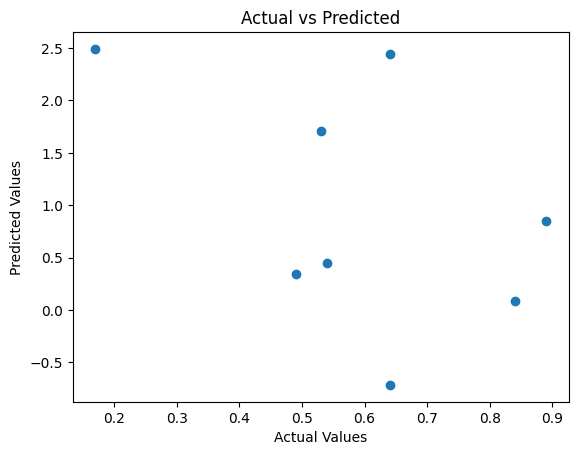

In [157]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, RMSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.9608547542988961
Mean Squared Error: 1.5569783592003208
Root Mean Squared Error: 1.2477893889596596
R-squared: -34.59316151908149


In [159]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})

print(comparison_df.head())

    Actual  Predicted  Difference
1     0.89   0.852489    0.037511
0     0.64   2.441652   -1.801652
14    0.49   0.345006    0.144994
9     0.84   0.084759    0.755241
21    0.53   1.704189   -1.174189


In [160]:
corr_matrix = X.corr()

# Identify highly correlated variables (threshold can be set to 0.8)
correlated_vars = corr_matrix[corr_matrix > 0.8]
correlated_vars


,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
FG,1.000000,NaN,0.817136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.940514
FGA,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FG%,0.817136,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.854216,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.808287
3P,NaN,NaN,NaN,1.000000,0.882758,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3PA,NaN,NaN,NaN,0.882758,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3P%,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2P,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.89534,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2PA,NaN,NaN,NaN,NaN,NaN,NaN,0.89534,1.00000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2P%,NaN,NaN,0.854216,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
#Remove variables that are highly correlated with eachother (0.8)
#Remove, FG%, 3P%, 2P%, FTA, 3PA, 2PA, PTS
X_red, y_red = X[['FG', 'FGA', '3P', '2P', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']], y
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, random_state=2)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


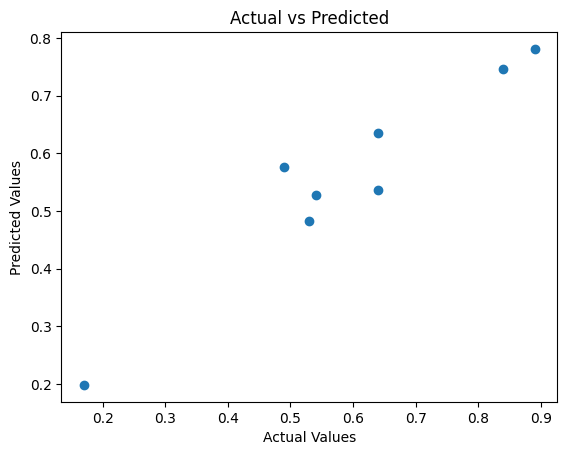

In [162]:
lr_red = LinearRegression()
lr_red.fit(X_train, y_train)

y_pred = lr_red.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [163]:
# Calculate MAE, MSE, RMSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.06071974792816627
Mean Squared Error: 0.005256570099737183
Root Mean Squared Error: 0.07250220755078554
R-squared: 0.8798326595287971


In [164]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})

print(comparison_df.head())

    Actual  Predicted  Difference
1     0.89   0.780739    0.109261
0     0.64   0.536716    0.103284
14    0.49   0.576178   -0.086178
9     0.84   0.746578    0.093422
21    0.53   0.481998    0.048002
